### Import Library

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

### Import Dataset

In [3]:
df = pd.read_csv("Mental-Health-Prediction-Dataset.csv")
df.sample(5)

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
307,1,0,Some Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,18-29,Female,"$25,000-$49,999",Mountain,Android Phone / Tablet
229,1,0,Completed Undergraduate,1,0,0.0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,> 60,Female,"$125,000-$149,999",New England,Android Phone / Tablet
253,0,0,Completed Masters,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,> 60,Female,"$200,000+",Middle Atlantic,iOS Phone / Tablet
54,1,0,Some Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,45-60,Male,"$100,000-$124,999",South Atlantic,iOS Phone / Tablet
254,0,1,Completed Undergraduate,1,0,1.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,> 60,Male,"$0-$9,999",West South Central,MacOS Desktop / Laptop


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    334 non-null    int64  
 1   I identify as having a mental illness                         334 non-null    int64  
 2   Education                                                     334 non-null    object 
 3   I have my own computer separate from a smart phone            334 non-null    int64  
 4   I have been hospitalized before for my mental illness         334 non-null    int64  
 5   How many days were you hospitalized for your mental illness   297 non-null    float64
 6   I am legally disabled                                         334 non-null    int64  
 7   I have my regular access to the internet                      334 non-n

### Rename Feature Column

In [5]:
#renaming Columns
df.rename(columns={'I identify as having a mental illness':'MentallyIll'}, inplace =True)
df.rename(columns={'Total length of any gaps in my resume in�months.':'Total length of any gaps in my resume in months'}, inplace =True)
df.rename(columns={'I am unemployed':'Unemployed'}, inplace =True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    334 non-null    int64  
 1   MentallyIll                                                   334 non-null    int64  
 2   Education                                                     334 non-null    object 
 3   I have my own computer separate from a smart phone            334 non-null    int64  
 4   I have been hospitalized before for my mental illness         334 non-null    int64  
 5   How many days were you hospitalized for your mental illness   297 non-null    float64
 6   I am legally disabled                                         334 non-null    int64  
 7   I have my regular access to the internet                      334 non-n

### Balance Value Class Dataset

In [7]:
non_mentallity = df[df['MentallyIll']==0]
mentallity = df[df['MentallyIll']==1]

In [8]:
non_mentallity.shape, mentallity.shape

((254, 31), (80, 31))

In [9]:
non_mentallity = non_mentallity.sample(mentallity.shape[0])
non_mentallity.shape

(80, 31)

In [10]:
non_mentallity.shape, mentallity.shape

((80, 31), (80, 31))

In [11]:
df = mentallity.append(non_mentallity, ignore_index=True)
df.head(5)

,I am currently employed at least part-time,MentallyIll,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
1,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet
2,1,1,Some Undergraduate,1,0,0.0,0,1,1,0,...,0.0,0.0,1.0,1.0,1.0,18-29,Male,"$100,000-$124,999",Middle Atlantic,Windows Desktop / Laptop
3,1,1,Some�Masters,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,30-44,Male,"$125,000-$149,999",South Atlantic,Android Phone / Tablet
4,1,1,Completed Undergraduate,1,0,0.0,0,1,0,0,...,1.0,0.0,0.0,1.0,0.0,18-29,Male,Prefer not to answer,Pacific,iOS Phone / Tablet


In [12]:
df["MentallyIll"].value_counts()

0    80
1    80
Name: MentallyIll, dtype: int64

Count MentallyIll 0 :  80
Count MentallyIll 1 :  80


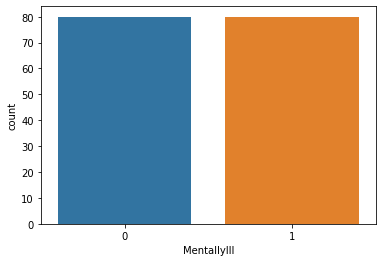

In [13]:
ax = sns.countplot(df["MentallyIll"], label="Count")
S, D = df["MentallyIll"].value_counts()
print("Count MentallyIll 0 : ", S)
print("Count MentallyIll 1 : ", D)

### Data Pre-Processing

In [14]:
df.isnull().sum()

I am currently employed at least part-time                       0
MentallyIll                                                      0
Education                                                        0
I have my own computer separate from a smart phone               0
I have been hospitalized before for my mental illness            0
How many days were you hospitalized for your mental illness     16
I am legally disabled                                            0
I have my regular access to the internet                         0
I live with my parents                                           0
I have a gap in my resume                                        0
Total length of any gaps in my resume in months                  0
Annual income (including any social welfare programs) in USD     0
Unemployed                                                       0
I read outside of work and school                                0
Annual income from social welfare programs                    

In [15]:
df.dtypes

I am currently employed at least part-time                        int64
MentallyIll                                                       int64
Education                                                        object
I have my own computer separate from a smart phone                int64
I have been hospitalized before for my mental illness             int64
How many days were you hospitalized for your mental illness     float64
I am legally disabled                                             int64
I have my regular access to the internet                          int64
I live with my parents                                            int64
I have a gap in my resume                                         int64
Total length of any gaps in my resume in months                   int64
Annual income (including any social welfare programs) in USD      int64
Unemployed                                                        int64
I read outside of work and school                               

In [16]:
for col in df:
    print(f'{col}: {df[col].unique()}')

I am currently employed at least part-time: [1 0]
MentallyIll: [1 0]
Education: ['Some Phd' 'Completed Undergraduate' 'Some Undergraduate' 'Some�Masters'
 'High School or GED' 'Completed Masters' 'Completed Phd'
 'Some highschool']
I have my own computer separate from a smart phone: [1 0]
I have been hospitalized before for my mental illness: [0 1]
How many days were you hospitalized for your mental illness: [  0.  35.  65.  20.  nan  78.  60.   8.  91.  14.   5.   2. 100.  42.
   1.  28.  15.  10.  27.  43.  99.]
I am legally disabled: [0 1]
I have my regular access to the internet: [1 0]
I live with my parents: [0 1]
I have a gap in my resume: [0 1]
Total length of any gaps in my resume in months: [  1  33   0  12  44  32   7  22 100  52   6  10   4  48   9  18   5  30
  24  59  20  28   3  36  73  13  14  15  66   2  53  11   8  21]
Annual income (including any social welfare programs) in USD: [ 22  32  11  12   0  50  59  48  55 100  24  38  18  10  46  28   7  27
  62  78  15  75 

In [17]:
#Replace Yes and No's with 0s and 1s, replace NaNs
df = df.replace(to_replace=['No', 'Yes'], value=[0, 1])
df = df.fillna(0)

#remove first row of response
df = df.iloc[1:]
df.head(5)

,I am currently employed at least part-time,MentallyIll,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
1,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet
2,1,1,Some Undergraduate,1,0,0.0,0,1,1,0,...,0.0,0.0,1.0,1.0,1.0,18-29,Male,"$100,000-$124,999",Middle Atlantic,Windows Desktop / Laptop
3,1,1,Some�Masters,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,30-44,Male,"$125,000-$149,999",South Atlantic,Android Phone / Tablet
4,1,1,Completed Undergraduate,1,0,0.0,0,1,0,0,...,1.0,0.0,0.0,1.0,0.0,18-29,Male,Prefer not to answer,Pacific,iOS Phone / Tablet
5,1,1,Completed Undergraduate,1,0,0.0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$50,000-$74,999",Middle Atlantic,Windows Desktop / Laptop


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 1 to 159
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    159 non-null    int64  
 1   MentallyIll                                                   159 non-null    int64  
 2   Education                                                     159 non-null    object 
 3   I have my own computer separate from a smart phone            159 non-null    int64  
 4   I have been hospitalized before for my mental illness         159 non-null    int64  
 5   How many days were you hospitalized for your mental illness   159 non-null    float64
 6   I am legally disabled                                         159 non-null    int64  
 7   I have my regular access to the internet                      159 non-n

In [19]:
#renaming income columns
df.rename(columns={'Annual income (including any social welfare programs) in USD':'Income'}, inplace =True)

In [20]:
income = pd.to_numeric(df.Income)

In [21]:
#Income stats of all respondents
income.describe()

count    159.000000
mean      35.270440
std       30.139903
min        0.000000
25%       12.000000
50%       27.000000
75%       53.500000
max      100.000000
Name: Income, dtype: float64

<AxesSubplot:xlabel='Education', ylabel='count'>

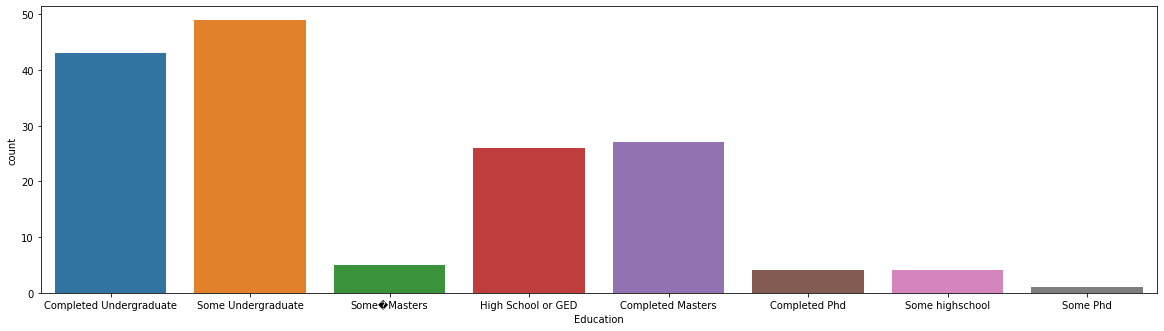

In [22]:
a4_dims = (20, 5.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(df.Education)
#sns.countplot(ill)

In [23]:
edu = df.Education.to_frame().to_records()

In [24]:
df.columns

Index(['I am currently employed at least part-time', 'MentallyIll',
       'Education', 'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I have my regular access to the internet',
       'I live with my parents', 'I have a gap in my resume',
       'Total length of any gaps in my resume in months', 'Income',
       'Unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking',
       'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness',
       'Age', 'Gender', 'Household Income', 'Region', 'Device Type'],
      dtype='object')

In [25]:
mental = df.MentallyIll.to_frame().to_records()
income = df.Income.to_frame().to_records()
unemployed = df.Unemployed.to_frame().to_records()
gender = df.Gender.to_frame().to_records()
age = df.Age.to_frame().to_records()

In [26]:
sixty, fifty, thirty, twenty = [], [], [], []
for i in age:
    if i[1] == '> 60':
        sixty.append((i[0], income[i[0]-1][1], unemployed[i[0]-1][1]))
    elif i[1] == '45-60':
        fifty.append((i[0], income[i[0]-1][1], unemployed[i[0]-1][1]))
    elif i[1] == '30-44':
        thirty.append((i[0], income[i[0]-1][1], unemployed[i[0]-1][1]))
    elif i[1] == '18-29':
        twenty.append((i[0], income[i[0]-1][1], unemployed[i[0]-1][1]))

In [27]:
age_list = [sixty, fifty, thirty, twenty]
title_age_list = ['Sixties', 'Fifties', 'Thirties', 'Twenties']
j = 0;
for i in age_list:
    #sort by income
    x_val = sorted([x[1] for x in i])
    unemp = [x[2] for x in i]

    #convert income to integers
    x_int = []
    for i in x_val:
        x_int.append(int(i))

    print(title_age_list[j], '-- Percent Unemployed:', sum(unemp)/len(unemp))
    j = j+1

Sixties -- Percent Unemployed: 0.4074074074074074
Fifties -- Percent Unemployed: 0.20833333333333334
Thirties -- Percent Unemployed: 0.2711864406779661
Twenties -- Percent Unemployed: 0.32


In [28]:
#separate and regroup data based on education level
completed_masters, completed_undergrad, high_school, some_Phd, completed_Phd, some_highschool, some_undergrad, some_masters = [], [], [], [],[], [], [], [] 
for i in edu:
    if i[1] == 'Completed Masters':
        completed_masters.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'Completed Undergraduate':
        completed_undergrad.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'High School or GED':
        high_school.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'Some Phd':
        some_Phd.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'Completed Phd':
        completed_Phd.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'Some highschool':
        some_highschool.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'Some Undergraduate':
        some_undergrad.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    else:
        some_masters.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))

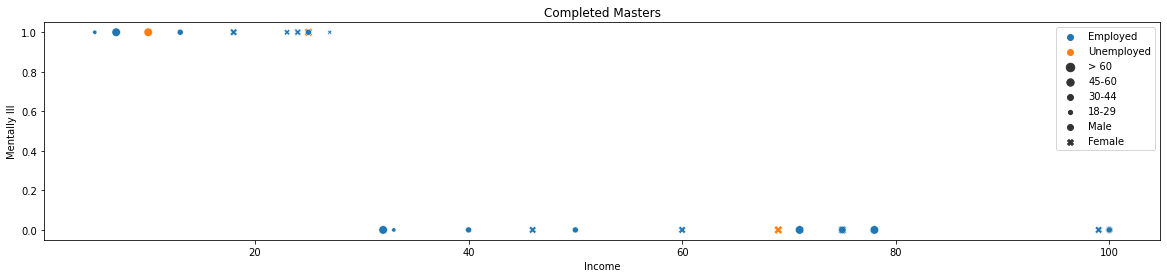

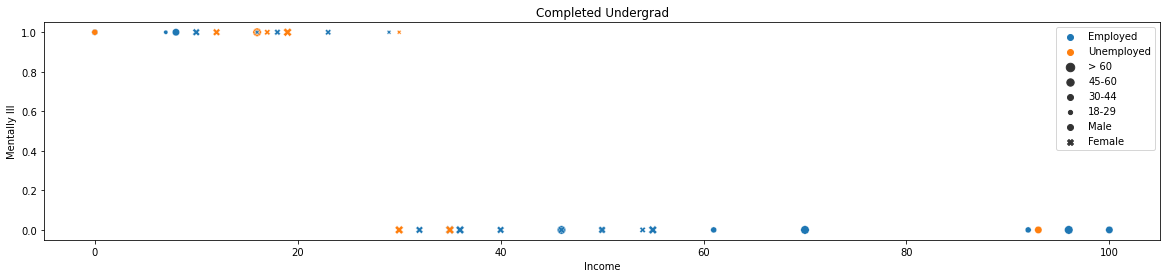

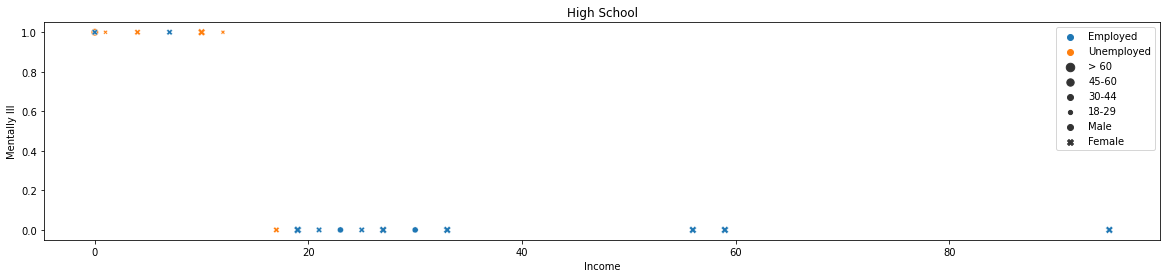

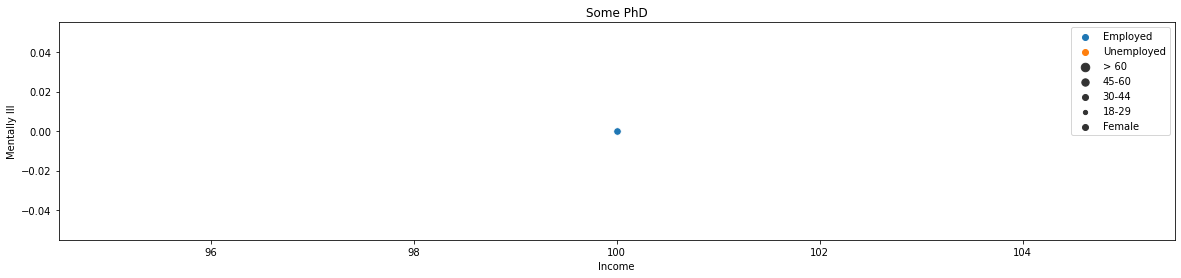

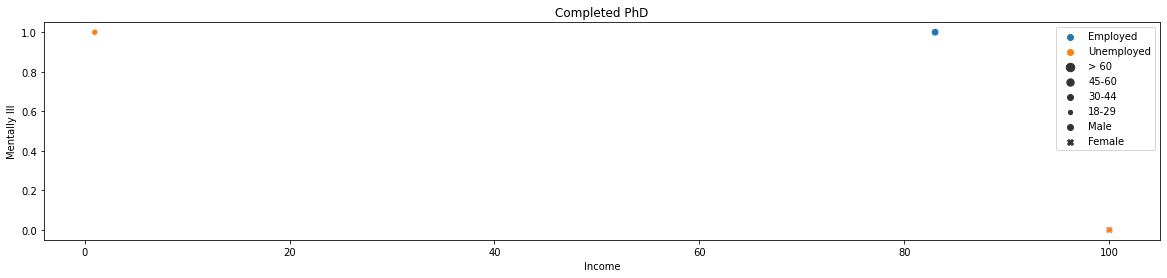

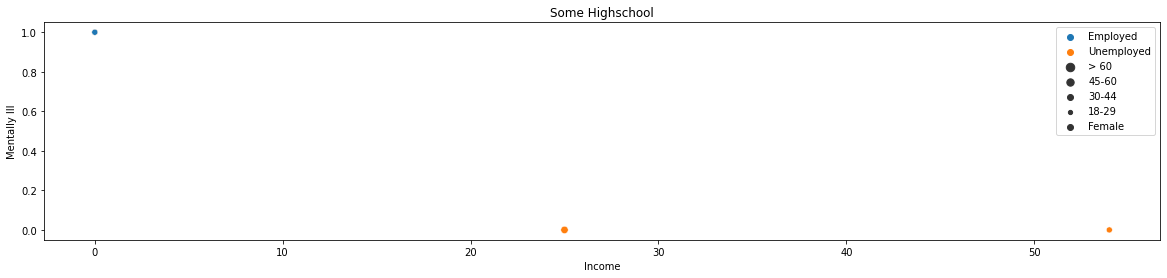

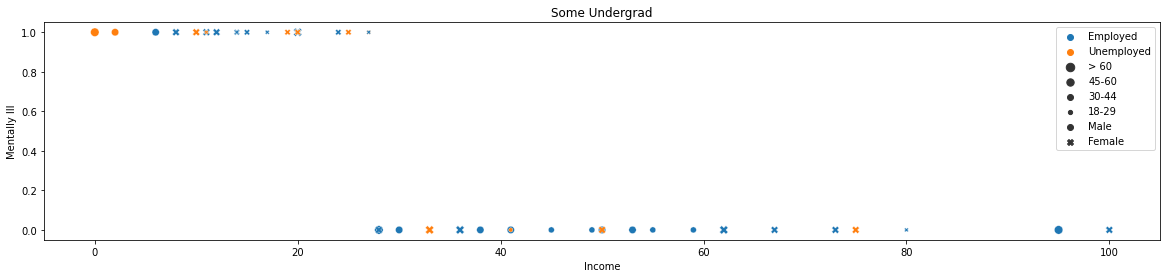

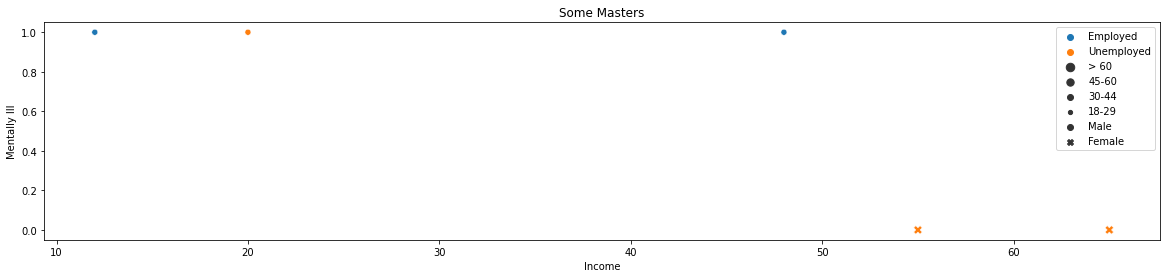

In [29]:
#Plot data, different graphs for different education levels
tot_list = [completed_masters, completed_undergrad, high_school, some_Phd, completed_Phd, some_highschool, some_undergrad, some_masters]
title_list = ['Completed Masters', 'Completed Undergrad', 'High School', 'Some PhD', 'Completed PhD', 'Some Highschool', 'Some Undergrad', 'Some Masters']
j = 0;
for i in tot_list:
    #sort by income
    x_val = sorted([x[2] for x in i])
    y_val = [x[1] for x in i]
    unemp = [x[3] for x in i]
    gend = [x[4] for x in i]
    age = [x[5] for x in i]

    #convert income to integers
    x_int = []
    for i in x_val:
        x_int.append(int(i))

    #convert binary employment to text labels
    for i in range(len(unemp)):
        if unemp[i] == 1:
            unemp[i] = 'Unemployed'
        elif unemp[i] == 0:
            unemp[i] = 'Employed'

    a4_dims = (20, 4)
    fig, ax = plt.subplots(figsize=a4_dims)
    g = sns.scatterplot(x = x_int, y=y_val, 
                        hue=unemp, hue_order = ('Employed', 'Unemployed'), 
                        style=gend, 
                        size=age, size_order = ('> 60', '45-60', '30-44','18-29'))
    ax.set(xlabel='Income', ylabel='Mentally Ill')
    plt.title(title_list[j])
    j = j+1

In [30]:
#use new dataframe for ML part
df2 = df
#remove last 3 irrelevant columns
df2 = df2.iloc[:, :-3]
#replace issues with binary representations
df2 = df2.replace(['Lack of concentration','Anxiety', 'Depression', 
                   'Obsessive thinking', 'Panic attacks', 'Compulsive behavior', 
                   'Mood swings', 'Tiredness'], 1)
#replace gender -> Male = 1, Female = 0
df2 = df2.replace(to_replace=['Female', 'Male'], value=[0, 1])
#replace age with median
df2 = df2.replace(to_replace=['> 60', '45-60', '30-44','18-29'], value=[65, 52, 37, 23])
#replace education with ranking, 0 is lowest educated 7 is highest
df2 = df2.replace(to_replace=['Completed Phd', 'Some Phd', 'Completed Masters','Some�Masters', 
                              'Completed Undergraduate', 'Some Undergraduate', 'High School or GED', 'Some highschool']
                              , value=[7, 6, 5, 4, 3, 2, 1, 0])

In [31]:
#Fully cleaned data
df2.head(5)

,I am currently employed at least part-time,MentallyIll,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender
1,1,1,3,1,1,35.0,1,1,0,1,...,1.0,1,1,1.0,1.0,1.0,1.0,1.0,37,1
2,1,1,2,1,0,0.0,0,1,1,0,...,1.0,1,1,0.0,0.0,1.0,1.0,1.0,23,1
3,1,1,4,1,0,0.0,0,1,0,0,...,0.0,1,1,0.0,0.0,0.0,0.0,1.0,37,1
4,1,1,3,1,0,0.0,0,1,0,0,...,0.0,1,0,1.0,0.0,0.0,1.0,0.0,23,1
5,1,1,3,1,0,0.0,0,1,0,1,...,0.0,1,1,0.0,0.0,0.0,0.0,0.0,37,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 1 to 159
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    159 non-null    int64  
 1   MentallyIll                                                   159 non-null    int64  
 2   Education                                                     159 non-null    object 
 3   I have my own computer separate from a smart phone            159 non-null    int64  
 4   I have been hospitalized before for my mental illness         159 non-null    int64  
 5   How many days were you hospitalized for your mental illness   159 non-null    float64
 6   I am legally disabled                                         159 non-null    int64  
 7   I have my regular access to the internet                      159 non-n

### Find Correlation per Feature on Dataset

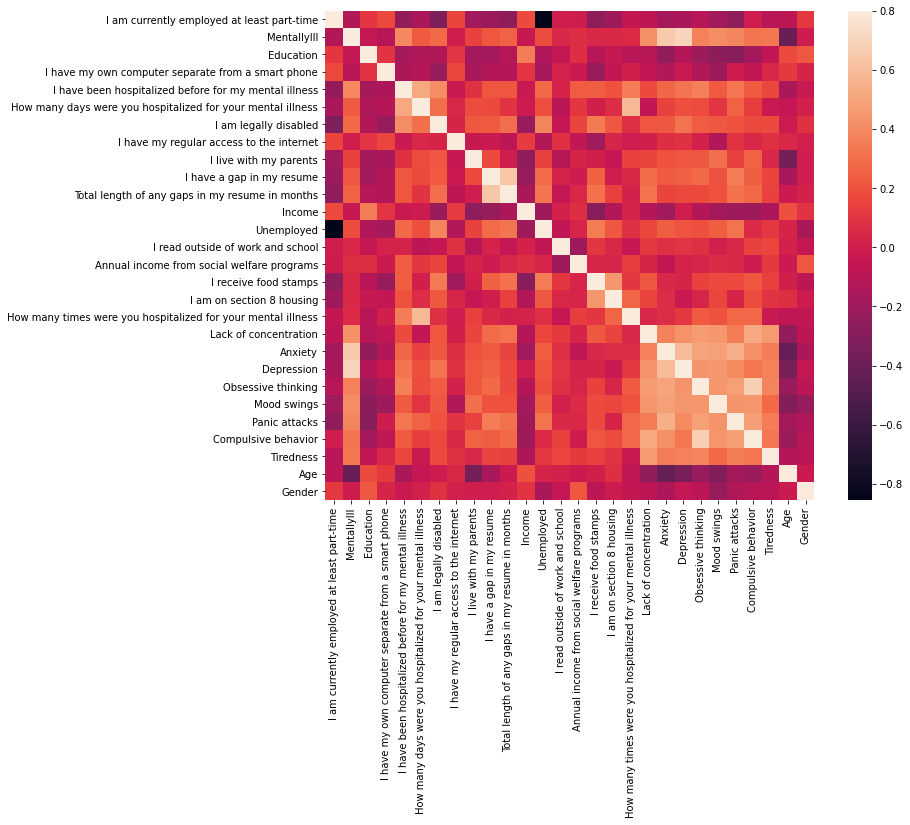

In [33]:
#Covariance Matrix
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

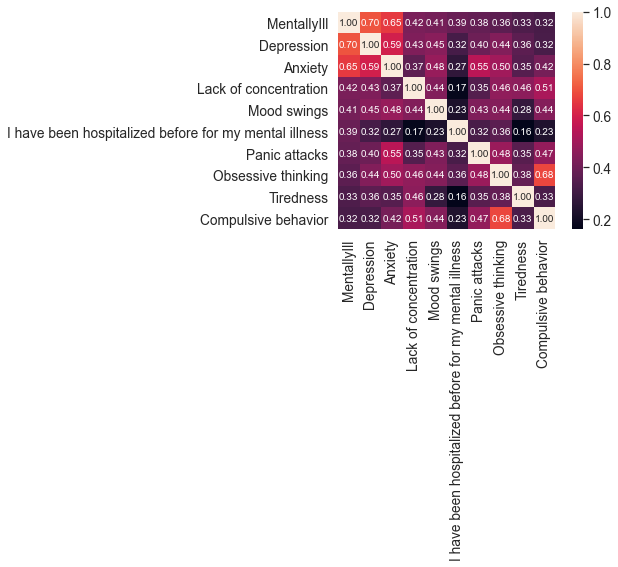

In [34]:
#MentallyIll correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'MentallyIll')['MentallyIll'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 1 to 159
Data columns (total 28 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    159 non-null    int64  
 1   MentallyIll                                                   159 non-null    int64  
 2   Education                                                     159 non-null    int64  
 3   I have my own computer separate from a smart phone            159 non-null    int64  
 4   I have been hospitalized before for my mental illness         159 non-null    int64  
 5   How many days were you hospitalized for your mental illness   159 non-null    float64
 6   I am legally disabled                                         159 non-null    int64  
 7   I have my regular access to the internet                      159 non-n

In [36]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

I am currently employed at least part-time: [1 0]
MentallyIll: [1 0]
Education: [3 2 4 1 5 7 0 6]
I have my own computer separate from a smart phone: [1 0]
I have been hospitalized before for my mental illness: [1 0]
How many days were you hospitalized for your mental illness: [ 35.   0.  65.  20.  78.  60.   8.  91.  14.   5.   2. 100.  42.   1.
  28.  15.  10.  27.  43.  99.]
I am legally disabled: [1 0]
I have my regular access to the internet: [1 0]
I live with my parents: [0 1]
I have a gap in my resume: [1 0]
Total length of any gaps in my resume in months: [ 33   0  12  44  32   7  22 100  52   6  10   4  48   9  18   5  30  24
  59  20  28   3  36  73  13  14  15  66   1   2  53  11   8  21]
Income: [ 32  11  12   0  50  59  48  55 100  24  38  18  10  46  28   7  27  62
  78  15  75   8  95  71  19  20  17  36  23  41  14  33  16  49  25  54
  30   2  40  29  61  96  80  35  93   6   4  92   5  13  56  21  73  70
  45  99  60  69  67  65   1  83  53]
Unemployed: [0 1]
I read o

### Split Data Between Class and Feature Class

In [37]:
# y=df2['MentallyIll']
# X=df2.drop(['MentallyIll'],axis=1,inplace=True)

X = df2.drop('MentallyIll',axis='columns')
y = df2['MentallyIll']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [39]:
X_train.shape

(127, 27)

In [40]:
X_test.shape

(32, 27)

In [41]:
X_train[:10]

,I am currently employed at least part-time,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months,...,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender
78,0,2,0,1,1.0,1,1,1,1,30,...,1.0,1,1,1.0,1.0,1.0,1.0,1.0,23,0
64,1,3,0,1,10.0,0,1,0,0,0,...,0.0,1,1,0.0,0.0,0.0,0.0,0.0,37,0
129,1,2,1,0,0.0,0,1,0,0,0,...,0.0,0,0,0.0,0.0,0.0,0.0,1.0,37,1
80,0,3,1,0,0.0,0,1,0,0,0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,65,0
116,1,5,1,0,0.0,0,1,0,0,0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,52,0
99,1,3,1,0,0.0,0,1,0,0,0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,52,0
7,0,4,1,1,65.0,1,1,1,1,44,...,0.0,0,1,1.0,0.0,1.0,0.0,0.0,37,1
54,1,2,1,0,0.0,0,1,1,0,0,...,1.0,1,1,1.0,1.0,0.0,1.0,1.0,23,0
16,1,3,1,0,0.0,0,1,0,0,6,...,0.0,1,1,0.0,0.0,1.0,0.0,0.0,23,1
85,1,2,1,0,0.0,1,1,0,0,0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,65,1


In [42]:
len(X_train.columns)

27

### Standard Scaler

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [45]:
X_train.shape

(127, 27)

In [46]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

### Implementation Convolutional Neural Network Method

In [47]:
num_epochs = 300
model = Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 26, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 26, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 25, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

In [49]:
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/300
4/4 [==============================] - 3s 136ms/step - loss: 0.7872 - accuracy: 0.6614 - val_loss: 0.5506 - val_accuracy: 0.7500
Epoch 2/300
4/4 [==============================] - 0s 14ms/step - loss: 0.8354 - accuracy: 0.7795 - val_loss: 0.5083 - val_accuracy: 0.9062
Epoch 3/300
4/4 [==============================] - 0s 15ms/step - loss: 0.5663 - accuracy: 0.8425 - val_loss: 0.4984 - val_accuracy: 0.9688
Epoch 4/300
4/4 [==============================] - 0s 15ms/step - loss: 0.7083 - accuracy: 0.8425 - val_loss: 0.5099 - val_accuracy: 0.9688
Epoch 5/300
4/4 [==============================] - 0s 14ms/step - loss: 0.4620 - accuracy: 0.8346 - val_loss: 0.5281 - val_accuracy: 0.8750
Epoch 6/300
4/4 [==============================] - 0s 14ms/step - loss: 0.4156 - accuracy: 0.8504 - val_loss: 0.5361 - val_accuracy: 0.8438
Epoch 7/300
4/4 [==============================] - 0s 12ms/step - loss: 0.3859 - accuracy: 0.8504 - val_loss: 0.5439 - val_accuracy: 0.8125
Epoch 8/300
4/4 [==

4/4 [==============================] - 0s 14ms/step - loss: 0.1010 - accuracy: 0.9685 - val_loss: 0.4906 - val_accuracy: 0.8125
Epoch 60/300
4/4 [==============================] - 0s 12ms/step - loss: 0.1322 - accuracy: 0.9606 - val_loss: 0.4849 - val_accuracy: 0.7812
Epoch 61/300
4/4 [==============================] - 0s 14ms/step - loss: 0.0433 - accuracy: 0.9843 - val_loss: 0.4797 - val_accuracy: 0.8125
Epoch 62/300
4/4 [==============================] - 0s 13ms/step - loss: 0.0880 - accuracy: 0.9528 - val_loss: 0.4757 - val_accuracy: 0.8125
Epoch 63/300
4/4 [==============================] - 0s 15ms/step - loss: 0.0917 - accuracy: 0.9843 - val_loss: 0.4732 - val_accuracy: 0.8125
Epoch 64/300
4/4 [==============================] - 0s 14ms/step - loss: 0.1050 - accuracy: 0.9764 - val_loss: 0.4660 - val_accuracy: 0.7812
Epoch 65/300
4/4 [==============================] - 0s 14ms/step - loss: 0.0934 - accuracy: 0.9606 - val_loss: 0.4698 - val_accuracy: 0.7812
Epoch 66/300
4/4 [========

4/4 [==============================] - 0s 14ms/step - loss: 0.0243 - accuracy: 0.9921 - val_loss: 0.6855 - val_accuracy: 0.8750
Epoch 118/300
4/4 [==============================] - 0s 13ms/step - loss: 0.0465 - accuracy: 0.9843 - val_loss: 0.6855 - val_accuracy: 0.8750
Epoch 119/300
4/4 [==============================] - 0s 13ms/step - loss: 0.0710 - accuracy: 0.9764 - val_loss: 0.6889 - val_accuracy: 0.8750
Epoch 120/300
4/4 [==============================] - 0s 14ms/step - loss: 0.0522 - accuracy: 0.9685 - val_loss: 0.6836 - val_accuracy: 0.8750
Epoch 121/300
4/4 [==============================] - 0s 13ms/step - loss: 0.0770 - accuracy: 0.9606 - val_loss: 0.6787 - val_accuracy: 0.8438
Epoch 122/300
4/4 [==============================] - 0s 13ms/step - loss: 0.0392 - accuracy: 0.9843 - val_loss: 0.6784 - val_accuracy: 0.8438
Epoch 123/300
4/4 [==============================] - 0s 13ms/step - loss: 0.0289 - accuracy: 1.0000 - val_loss: 0.6767 - val_accuracy: 0.8438
Epoch 124/300
4/4 [=

Epoch 175/300
4/4 [==============================] - 0s 14ms/step - loss: 0.0306 - accuracy: 1.0000 - val_loss: 0.7800 - val_accuracy: 0.8750
Epoch 176/300
4/4 [==============================] - 0s 15ms/step - loss: 0.0274 - accuracy: 0.9764 - val_loss: 0.7671 - val_accuracy: 0.9062
Epoch 177/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0332 - accuracy: 0.9843 - val_loss: 0.7341 - val_accuracy: 0.9062
Epoch 178/300
4/4 [==============================] - 0s 15ms/step - loss: 0.0465 - accuracy: 0.9764 - val_loss: 0.7165 - val_accuracy: 0.9062
Epoch 179/300
4/4 [==============================] - 0s 16ms/step - loss: 0.0239 - accuracy: 0.9921 - val_loss: 0.7087 - val_accuracy: 0.9062
Epoch 180/300
4/4 [==============================] - 0s 16ms/step - loss: 0.0254 - accuracy: 0.9843 - val_loss: 0.7039 - val_accuracy: 0.9062
Epoch 181/300
4/4 [==============================] - 0s 13ms/step - loss: 0.0289 - accuracy: 0.9921 - val_loss: 0.7014 - val_accuracy: 0.9062
Epoch 

4/4 [==============================] - 0s 13ms/step - loss: 0.0232 - accuracy: 0.9921 - val_loss: 1.0695 - val_accuracy: 0.8438
Epoch 233/300
4/4 [==============================] - 0s 14ms/step - loss: 0.0213 - accuracy: 0.9921 - val_loss: 1.0783 - val_accuracy: 0.8438
Epoch 234/300
4/4 [==============================] - 0s 13ms/step - loss: 0.0234 - accuracy: 0.9921 - val_loss: 1.0711 - val_accuracy: 0.8438
Epoch 235/300
4/4 [==============================] - 0s 14ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 1.0480 - val_accuracy: 0.8438
Epoch 236/300
4/4 [==============================] - 0s 12ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 1.0250 - val_accuracy: 0.8438
Epoch 237/300
4/4 [==============================] - 0s 13ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 1.0100 - val_accuracy: 0.8438
Epoch 238/300
4/4 [==============================] - 0s 12ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.0010 - val_accuracy: 0.8750
Epoch 239/300
4/4 [=

Epoch 290/300
4/4 [==============================] - 0s 13ms/step - loss: 0.0220 - accuracy: 0.9921 - val_loss: 0.8796 - val_accuracy: 0.8750
Epoch 291/300
4/4 [==============================] - 0s 14ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.8931 - val_accuracy: 0.8750
Epoch 292/300
4/4 [==============================] - 0s 13ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.9000 - val_accuracy: 0.8750
Epoch 293/300
4/4 [==============================] - 0s 13ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.8967 - val_accuracy: 0.8750
Epoch 294/300
4/4 [==============================] - 0s 13ms/step - loss: 0.0157 - accuracy: 0.9921 - val_loss: 0.8925 - val_accuracy: 0.8750
Epoch 295/300
4/4 [==============================] - 0s 13ms/step - loss: 0.0311 - accuracy: 0.9921 - val_loss: 0.9633 - val_accuracy: 0.8750
Epoch 296/300
4/4 [==============================] - 0s 12ms/step - loss: 0.0285 - accuracy: 0.9764 - val_loss: 1.0323 - val_accuracy: 0.8750
Epoch 

In [51]:
def plot_learningCurve(history, epoch):
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'], loc='upper left')
    plt.show()
    
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.plot('Model loss')
    plt.plot('Epoch')
    plt.legend(['Train','Val'], loc='upper left')
    plt.show

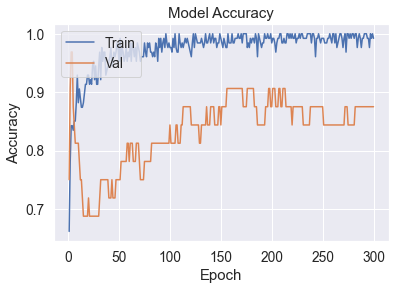

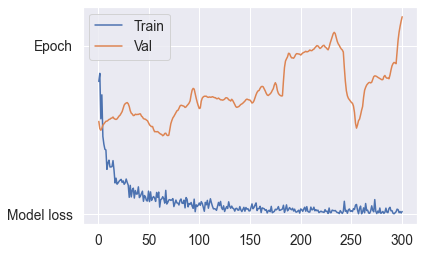

In [52]:
plot_learningCurve(history, num_epochs)

In [53]:
num_epochs = 400
model = Sequential()
model.add(Conv1D(32,2,activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/400
4/4 [==============================] - 2s 119ms/step - loss: 1.8109 - accuracy: 0.5354 - val_loss: 0.7325 - val_accuracy: 0.3750
Epoch 2/400
4/4 [==============================] - 0s 13ms/step - loss: 1.7395 - accuracy: 0.5354 - val_loss: 0.7229 - val_accuracy: 0.3750
Epoch 3/400
4/4 [==============================] - 0s 12ms/step - loss: 1.3639 - accuracy: 0.5276 - val_loss: 0.7133 - val_accuracy: 0.4688
Epoch 4/400
4/4 [==============================] - 0s 12ms/step - loss: 1.5792 - accuracy: 0.5748 - val_loss: 0.7043 - val_accuracy: 0.5000
Epoch 5/400
4/4 [==============================] - 0s 13ms/step - loss: 1.2896 - accuracy: 0.5354 - val_loss: 0.6969 - val_accuracy: 0.5625
Epoch 6/400
4/4 [==============================] - 0s 11ms/step - loss: 1.2024 - accuracy: 0.5669 - val_loss: 0.6906 - val_accuracy: 0.5938
Epoch 7/400
4/4 [==============================] - 0s 13ms/step - loss: 1.5429 - accuracy: 0.5276 - val_loss: 0.6846 - val_accuracy: 0.6250
Epoch 8/400
4/4 [==

4/4 [==============================] - 0s 12ms/step - loss: 0.9121 - accuracy: 0.6850 - val_loss: 0.5908 - val_accuracy: 0.5938
Epoch 60/400
4/4 [==============================] - 0s 12ms/step - loss: 0.7135 - accuracy: 0.7087 - val_loss: 0.5845 - val_accuracy: 0.6250
Epoch 61/400
4/4 [==============================] - ETA: 0s - loss: 0.4449 - accuracy: 0.81 - 0s 12ms/step - loss: 0.6228 - accuracy: 0.7559 - val_loss: 0.5791 - val_accuracy: 0.6250
Epoch 62/400
4/4 [==============================] - 0s 13ms/step - loss: 0.6518 - accuracy: 0.7480 - val_loss: 0.5740 - val_accuracy: 0.6250
Epoch 63/400
4/4 [==============================] - 0s 12ms/step - loss: 0.5892 - accuracy: 0.7480 - val_loss: 0.5677 - val_accuracy: 0.6250
Epoch 64/400
4/4 [==============================] - 0s 13ms/step - loss: 0.6842 - accuracy: 0.7323 - val_loss: 0.5619 - val_accuracy: 0.6250
Epoch 65/400
4/4 [==============================] - 0s 13ms/step - loss: 0.6924 - accuracy: 0.6929 - val_loss: 0.5552 - val_a

Epoch 117/400
4/4 [==============================] - 0s 11ms/step - loss: 0.6009 - accuracy: 0.7559 - val_loss: 0.3108 - val_accuracy: 0.9062
Epoch 118/400
4/4 [==============================] - 0s 11ms/step - loss: 0.4738 - accuracy: 0.7874 - val_loss: 0.3085 - val_accuracy: 0.9062
Epoch 119/400
4/4 [==============================] - 0s 12ms/step - loss: 0.5814 - accuracy: 0.7874 - val_loss: 0.3060 - val_accuracy: 0.9062
Epoch 120/400
4/4 [==============================] - 0s 14ms/step - loss: 0.5843 - accuracy: 0.8031 - val_loss: 0.3033 - val_accuracy: 0.9062
Epoch 121/400
4/4 [==============================] - 0s 12ms/step - loss: 0.5788 - accuracy: 0.7953 - val_loss: 0.3012 - val_accuracy: 0.9062
Epoch 122/400
4/4 [==============================] - 0s 13ms/step - loss: 0.6337 - accuracy: 0.8031 - val_loss: 0.2990 - val_accuracy: 0.9062
Epoch 123/400
4/4 [==============================] - 0s 12ms/step - loss: 0.6604 - accuracy: 0.7244 - val_loss: 0.2968 - val_accuracy: 0.9062
Epoch 

Epoch 175/400
4/4 [==============================] - 0s 13ms/step - loss: 0.4176 - accuracy: 0.7874 - val_loss: 0.2449 - val_accuracy: 0.9062
Epoch 176/400
4/4 [==============================] - 0s 12ms/step - loss: 0.6209 - accuracy: 0.8110 - val_loss: 0.2441 - val_accuracy: 0.9062
Epoch 177/400
4/4 [==============================] - 0s 12ms/step - loss: 0.4796 - accuracy: 0.8110 - val_loss: 0.2434 - val_accuracy: 0.9062
Epoch 178/400
4/4 [==============================] - 0s 12ms/step - loss: 0.4498 - accuracy: 0.8031 - val_loss: 0.2425 - val_accuracy: 0.9062
Epoch 179/400
4/4 [==============================] - 0s 13ms/step - loss: 0.4765 - accuracy: 0.8189 - val_loss: 0.2420 - val_accuracy: 0.9062
Epoch 180/400
4/4 [==============================] - 0s 12ms/step - loss: 0.4550 - accuracy: 0.8110 - val_loss: 0.2418 - val_accuracy: 0.9062
Epoch 181/400
4/4 [==============================] - 0s 12ms/step - loss: 0.4670 - accuracy: 0.8189 - val_loss: 0.2412 - val_accuracy: 0.9062
Epoch 

Epoch 233/400
4/4 [==============================] - 0s 12ms/step - loss: 0.3776 - accuracy: 0.8268 - val_loss: 0.2262 - val_accuracy: 0.9375
Epoch 234/400
4/4 [==============================] - 0s 12ms/step - loss: 0.5778 - accuracy: 0.7717 - val_loss: 0.2260 - val_accuracy: 0.9375
Epoch 235/400
4/4 [==============================] - 0s 13ms/step - loss: 0.4616 - accuracy: 0.8504 - val_loss: 0.2260 - val_accuracy: 0.9375
Epoch 236/400
4/4 [==============================] - 0s 13ms/step - loss: 0.4024 - accuracy: 0.8583 - val_loss: 0.2256 - val_accuracy: 0.9375
Epoch 237/400
4/4 [==============================] - 0s 12ms/step - loss: 0.5316 - accuracy: 0.8031 - val_loss: 0.2253 - val_accuracy: 0.9375
Epoch 238/400
4/4 [==============================] - 0s 11ms/step - loss: 0.5342 - accuracy: 0.8346 - val_loss: 0.2250 - val_accuracy: 0.9375
Epoch 239/400
4/4 [==============================] - 0s 12ms/step - loss: 0.4306 - accuracy: 0.8031 - val_loss: 0.2248 - val_accuracy: 0.9375
Epoch 

Epoch 291/400
4/4 [==============================] - 0s 11ms/step - loss: 0.4213 - accuracy: 0.8268 - val_loss: 0.2159 - val_accuracy: 0.9375
Epoch 292/400
4/4 [==============================] - 0s 12ms/step - loss: 0.3799 - accuracy: 0.8268 - val_loss: 0.2157 - val_accuracy: 0.9375
Epoch 293/400
4/4 [==============================] - 0s 13ms/step - loss: 0.4273 - accuracy: 0.8504 - val_loss: 0.2158 - val_accuracy: 0.9375
Epoch 294/400
4/4 [==============================] - 0s 11ms/step - loss: 0.3916 - accuracy: 0.8268 - val_loss: 0.2159 - val_accuracy: 0.9375
Epoch 295/400
4/4 [==============================] - 0s 12ms/step - loss: 0.3760 - accuracy: 0.8504 - val_loss: 0.2159 - val_accuracy: 0.9375
Epoch 296/400
4/4 [==============================] - 0s 13ms/step - loss: 0.3774 - accuracy: 0.8504 - val_loss: 0.2161 - val_accuracy: 0.9375
Epoch 297/400
4/4 [==============================] - 0s 13ms/step - loss: 0.4249 - accuracy: 0.8425 - val_loss: 0.2166 - val_accuracy: 0.9375
Epoch 

Epoch 349/400
4/4 [==============================] - 0s 12ms/step - loss: 0.4166 - accuracy: 0.8268 - val_loss: 0.2103 - val_accuracy: 0.9375
Epoch 350/400
4/4 [==============================] - 0s 13ms/step - loss: 0.3541 - accuracy: 0.8583 - val_loss: 0.2103 - val_accuracy: 0.9375
Epoch 351/400
4/4 [==============================] - 0s 13ms/step - loss: 0.4299 - accuracy: 0.8110 - val_loss: 0.2096 - val_accuracy: 0.9375
Epoch 352/400
4/4 [==============================] - 0s 14ms/step - loss: 0.3042 - accuracy: 0.8661 - val_loss: 0.2094 - val_accuracy: 0.9375
Epoch 353/400
4/4 [==============================] - 0s 13ms/step - loss: 0.3508 - accuracy: 0.8425 - val_loss: 0.2096 - val_accuracy: 0.9375
Epoch 354/400
4/4 [==============================] - 0s 12ms/step - loss: 0.4227 - accuracy: 0.8425 - val_loss: 0.2098 - val_accuracy: 0.9375
Epoch 355/400
4/4 [==============================] - 0s 11ms/step - loss: 0.3677 - accuracy: 0.8583 - val_loss: 0.2101 - val_accuracy: 0.9375
Epoch 

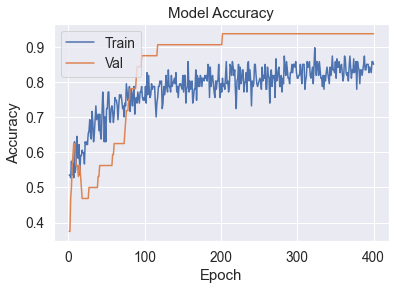

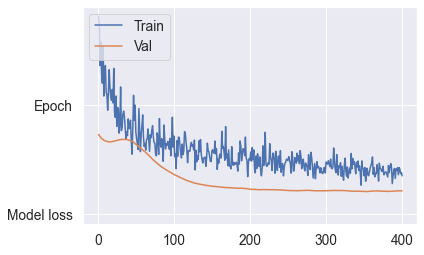

In [54]:
plot_learningCurve(history,num_epochs)